In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
%matplotlib inline
import matplotlib.cm as cm

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [42]:
train, test = [pd.read_csv(f) for f in ["trainCV.csv","testCV.csv"]]

In [6]:
nObs = 100
w = 64
h = 64
imgs = np.empty((nObs,1,w,h))
for idx in range(100):
    img = cv2.imread("train/"+train["classname"][idx]+"/"+train["img"][idx],0)
    dst = cv2.resize(img,(w,h))
    imgs[idx] = dst
imgsFlat = imgs.reshape(nObs,-1)
meanImg = imgsFlat.mean(0,keepdims=1)
#imgsFlat-= meanImg #remove mean

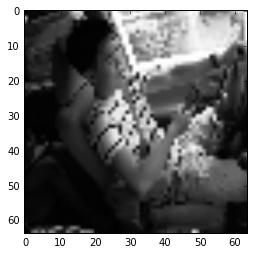

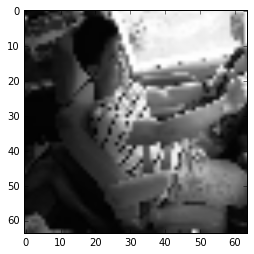

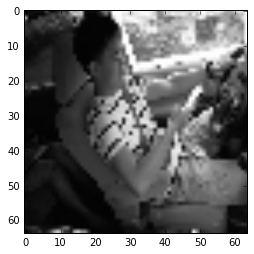

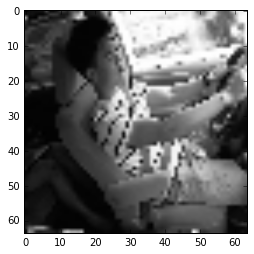

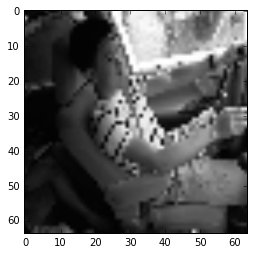

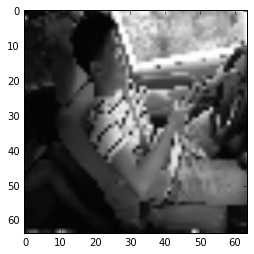

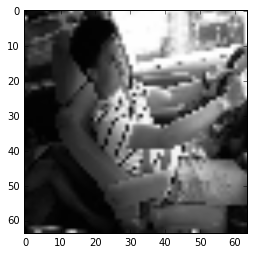

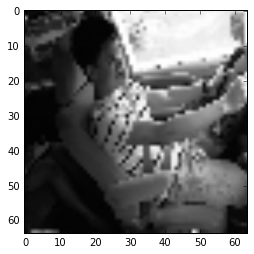

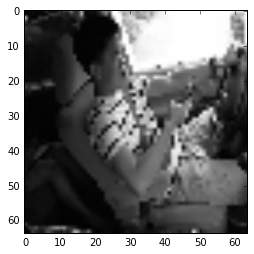

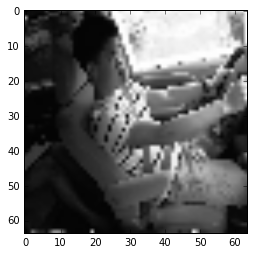

In [73]:
np.random.seed(101)
idxs = np.random.randint(0,nObs,10)
for idx in idxs:
    plt.imshow(imgs[idx].squeeze(),cmap=cm.gray)
    plt.show()

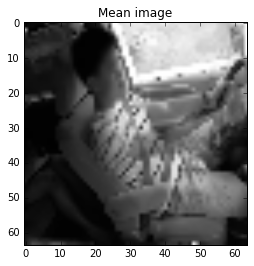

In [65]:
plt.imshow(meanImg.reshape(w,h),cmap=cm.gray)
plt.title("Mean image")
plt.show()

In [8]:
imgsMeanRemoved = imgsFlat - meanImg

In [37]:
covariance = np.cov(imgsMeanRemoved.T)

In [40]:
E,values, Et = np.linalg.svd(covariance)

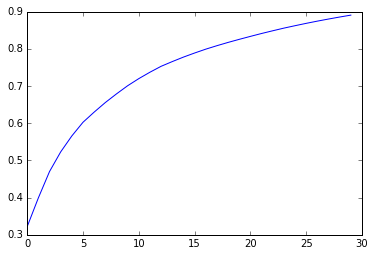

In [102]:
scree = np.divide(values,values.sum()).cumsum()
plt.plot(scree[:30])
plt.show()

In [147]:
np.dot(El,valuesl.T).shape

(4096,)

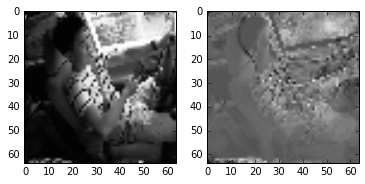

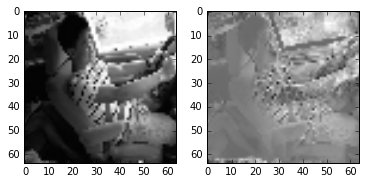

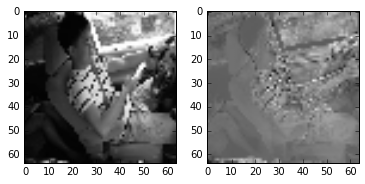

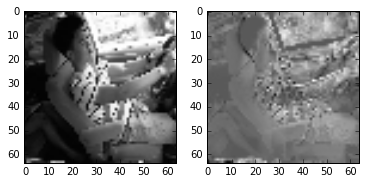

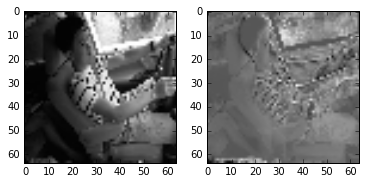

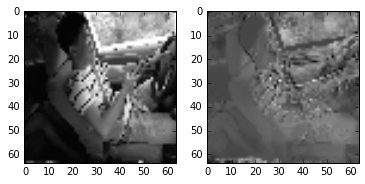

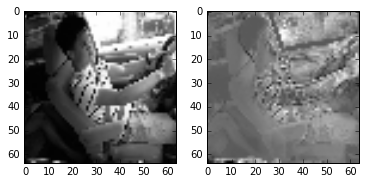

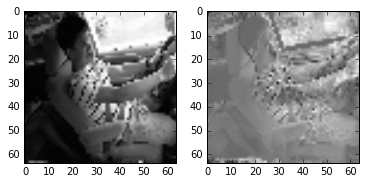

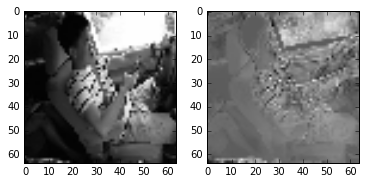

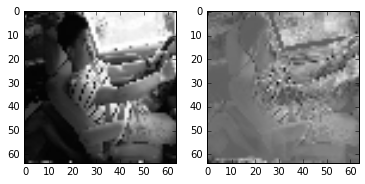

In [138]:
for idx in idxs:
    img = imgsFlat[idx]
    L = 30 # number of principle modes
    El = E[:,0:L]
    valuesl = values[:L]
    subspace = np.dot(El.T,img)
    pca = np.dot(El,subspace.T)
    #zca = np.dot(El,np.sqrt(1/values[:L]) + 0.001).dot(subspace.T)
    plt.subplot(121)
    plt.imshow(img.reshape(w,h),cmap=cm.gray)
    plt.subplot(122)
    plt.imshow(pca.reshape(w,h),cmap=cm.gray)
    #plt.subplot(123)
    #plt.imshow(zca.reshape(w,h),cmap=cm.gray)
    plt.show()